<a href="https://colab.research.google.com/github/Digvijay25182316/ML/blob/main/Babyemotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"digvijayedake","key":"b2b9ab522d2969ace1bb685e91349ca0"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d msambare/fer2013

 93% 56.0M/60.3M [00:01<00:00, 50.5MB/s]
100% 60.3M/60.3M [00:01<00:00, 51.9MB/s]


In [ ]:
!unzip "fer2013.zip" -d .

Streaming output truncated to the last 5000 lines.
  inflating: ./train/sad/Training_65242339.jpg  
  inflating: ./train/sad/Training_65267116.jpg  
  inflating: ./train/sad/Training_65275626.jpg  
  inflating: ./train/sad/Training_6529266.jpg  
  inflating: ./train/sad/Training_65329617.jpg  
  inflating: ./train/sad/Training_65338712.jpg  
  inflating: ./train/sad/Training_65338797.jpg  
  inflating: ./train/sad/Training_65387162.jpg  
  inflating: ./train/sad/Training_65404494.jpg  
  inflating: ./train/sad/Training_65426218.jpg  
  inflating: ./train/sad/Training_65430136.jpg  
  inflating: ./train/sad/Training_65437377.jpg  
  inflating: ./train/sad/Training_6545735.jpg  
  inflating: ./train/sad/Training_65463385.jpg  
  inflating: ./train/sad/Training_65473985.jpg  
  inflating: ./train/sad/Training_65502829.jpg  
  inflating: ./train/sad/Training_65505359.jpg  
  inflating: ./train/sad/Training_65508578.jpg  
  inflating: ./train/sad/Training_65516023.jpg  
  inflating: ./train

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('/content/train'):
    if not j.startswith('.'): # If running this code locally, this is to
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup
for i in  lookup:
  print(i)
  path=os.listdir('test/'+str(i)+'/')
  print(path)
  print(len(path))

surprise
['PublicTest_66065964.jpg', 'PublicTest_28247750.jpg', 'PublicTest_36015827.jpg', 'PrivateTest_47372428.jpg', 'PrivateTest_30073403.jpg', 'PublicTest_34334611.jpg', 'PrivateTest_90663142.jpg', 'PrivateTest_21253405.jpg', 'PublicTest_55075980.jpg', 'PublicTest_94398836.jpg', 'PrivateTest_33008622.jpg', 'PrivateTest_46290479.jpg', 'PrivateTest_69492660.jpg', 'PrivateTest_8416578.jpg', 'PrivateTest_28499099.jpg', 'PublicTest_67579465.jpg', 'PublicTest_74706022.jpg', 'PublicTest_91187876.jpg', 'PrivateTest_92553807.jpg', 'PrivateTest_66131494.jpg', 'PrivateTest_1667417.jpg', 'PublicTest_68219184.jpg', 'PrivateTest_139065.jpg', 'PublicTest_35290127.jpg', 'PrivateTest_99709238.jpg', 'PrivateTest_30726237.jpg', 'PrivateTest_12641070.jpg', 'PublicTest_62174534.jpg', 'PrivateTest_45784436.jpg', 'PublicTest_38966726.jpg', 'PublicTest_91780905.jpg', 'PublicTest_66116810.jpg', 'PrivateTest_34869242.jpg', 'PrivateTest_72822627.jpg', 'PublicTest_32045.jpg', 'PrivateTest_45239840.jpg', 'Priv

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (48, 48),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (48, 48),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',input_shape=[48, 48, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.25))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.25))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.25))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(7,activation
             ='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
898/898 [==============================] - ETA: 0s - loss: 1.7467 - accuracy: 0.2854

KeyboardInterrupt: ignored

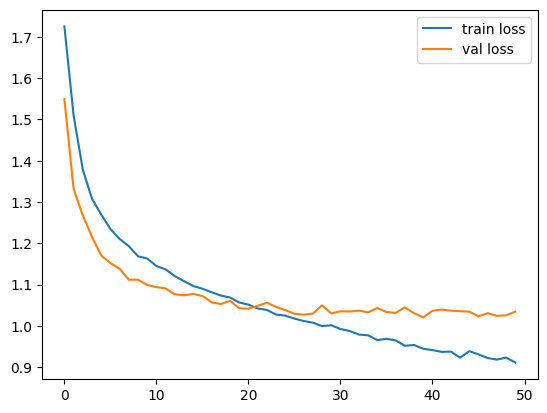

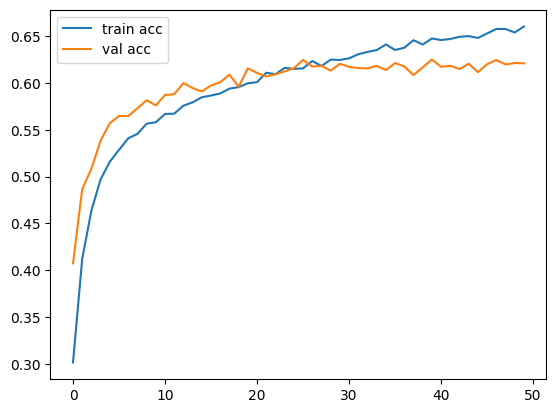

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

cnn.save('model_emotion_detector.h5')

In [ ]:
from tensorflow.keras.models import load_model

# load model
model = load_model('model_emotion_detector.h5')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_12 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 10, 10, 128)       0         
 ng2D)                                                

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('test/angry/PrivateTest_37547773.jpg', target_size = (48,48),color_mode = 'grayscale')
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

1/1 [==============================] - 0s 328ms/step


In [ ]:
result

array([[4.1304013e-01, 1.4972405e-01, 1.3859028e-01, 1.6572369e-04,
        3.4650814e-02, 2.5734347e-01, 6.4855143e-03]], dtype=float32)

In [ ]:
# Get the class with the highest probability
predicted_class = np.argmax(result)

# Map the predicted class to the corresponding label
class_labels = ["class1", "class2", "class3", "class4", "class5", "class6", "class7"]
predicted_label = class_labels[predicted_class]

# Print the result
print(f"The image is classified as {predicted_label} with confidence: {result[0][predicted_class]}")

The image is classified as class1 with confidence: 0.4130401313304901
